In [60]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import time 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB 
   

In [5]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\bharath's file\DS\csv\SalaryData_Train(1).csv"
df.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [30]:
df.shape

(15060, 14)

In [31]:
col_names = ['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation', 'relationship',
             'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native', 'Salary']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [32]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [33]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [34]:
# view the categorical variables

df[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [35]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [36]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-servic

In [37]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

 Private             0.731806
 Self-emp-not-inc    0.086122
 Local-gov           0.068592
 State-gov           0.044290
 Self-emp-inc        0.037981
 Federal-gov         0.030744
 Without-pay         0.000465
Name: workclass, dtype: float64
 HS-grad         0.328220
 Some-college    0.213878
 Bachelors       0.167729
 Masters         0.058898
 Assoc-voc       0.043293
 11th            0.037915
 Assoc-acdm      0.033134
 10th            0.026760
 7th-8th         0.017663
 Prof-school     0.016135
 9th             0.014675
 12th            0.013280
 Doctorate       0.011222
 5th-6th         0.010691
 1st-4th         0.004714
 Preschool       0.001793
Name: education, dtype: float64
 Married-civ-spouse       0.464143
 Never-married            0.323506
 Divorced                 0.138313
 Separated                0.031341
 Widowed                  0.029880
 Married-spouse-absent    0.012085
 Married-AF-spouse        0.000730
Name: maritalstatus, dtype: float64
 Exec-managerial      0.13227

In [38]:
# check labels in workclass variable

df.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [39]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

In [40]:
# replace '?' values in workclass variable with `NaN`


df['workclass'].replace('?', np.NaN, inplace=True)

In [41]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

In [42]:
# check labels in occupation variable

df.occupation.unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [43]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

In [44]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace('?', np.NaN, inplace=True)


In [45]:
# again check the frequency distribution of values in occupation variable

df.occupation.value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

In [47]:
# check labels in native_country variable

df.native.unique()

array([' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [49]:
# check frequency distribution of values in native_country variable

df.native.value_counts()

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 Dominican-Republic               30
 Japan                            30
 South                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

In [51]:
# replace '?' values in native_country variable with `NaN`

df['native'].replace('?', np.NaN, inplace=True)

In [53]:
# again check the frequency distribution of values in native_country variable

df.native.value_counts()


 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 Dominican-Republic               30
 Japan                            30
 South                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

# Check missing values in categorical variables again

In [54]:
df[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [55]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')


workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [56]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)


There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [57]:
# view the numerical variables

df[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30


In [58]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [1]:
X = df.drop(["Salary"], axis=1)

y = df["Salary"]

NameError: name 'df' is not defined

In [61]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [62]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10542, 13), (4518, 13))

# Encode categorical variables

In [71]:
# print categorical variables

categorical


['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [72]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
4324,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2179,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,India
1906,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Black,Female,United-States
5206,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,United-States
4659,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,United-States


In [74]:
# import category encoders

import category_encoders as ce

In [76]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [77]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4324,41,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2179,53,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1906,65,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5206,63,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4659,23,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
X_train.shape

(10542, 102)

In [79]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4269,37,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7027,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8418,41,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10064,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3305,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X_test.shape

(4518, 102)

# Feature Scaling

In [81]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model training

In [82]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [83]:
y_pred = gnb.predict(X_test)

y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [84]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8028


In [85]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' >50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [86]:
# check class distribution in test set

y_test.value_counts()

 <=50K    3385
 >50K     1133
Name: Salary, dtype: int64

# Confusion matrix 

In [87]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2709  676]
 [ 215  918]]

True Positives(TP) =  2709

True Negatives(TN) =  918

False Positives(FP) =  676

False Negatives(FN) =  215


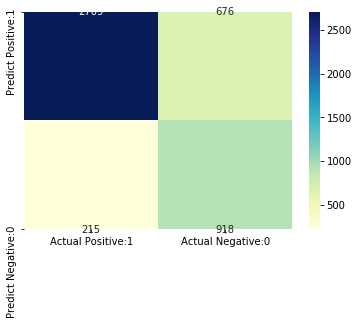

In [88]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')